In [112]:
import numpy as np
import matplotlib.pyplot as plt

In [113]:
class state:
    def __init__(self) -> None:
        self.x = 0            # m
        self.y = 0            # m
        self.yaw = np.pi/4    # rad
        self.v = 0.02         # m/s
        self.omega = 0        # rad/s    
    
    def simulate(self, w, dt):
        dyaw = w * dt        
        if (w == 0):
            dx = self.v * dt
            dy = 0
        else:
            r = self.v/w
            dx = r*np.sin(dyaw)
            dy = r*(1-np.cos(dyaw))
            
        x = self.x + dx*np.cos(self.yaw) - dy*np.sin(self.yaw)
        y = self.y + dx*np.sin(self.yaw) + dy*np.cos(self.yaw)
        yaw = self.yaw + dyaw
        
        return x, y, yaw
        
    def sample_w (self, func, dt):
        epsilon = 0.0001
        
        for iw in np.linspace(0, np.pi/2, 1000):
            x, y, yaw = self.simulate(iw, dt)
            if (func(x) - epsilon < y < func(x) + epsilon):
                return iw, x, y, yaw
            
            x, y, yaw = self.simulate(-iw, dt)
            if (func(x) - epsilon < y < func(x) + epsilon):
                return -iw, x, y, yaw
            
            
        return None, None, None, None

In [114]:
dt = 0.01

x_list = []
y_list = []
v_list = []
w_list = []
t_list = []
yaw_list = []

s = state()
is_End = False
t = 0.0

while not is_End:
    x_list.append(s.x)
    y_list.append(s.y)
    v_list.append(s.v)
    t_list.append(t)
    yaw_list.append(s.yaw)
    

    s.omega, s.x, s.y, s.yaw = s.sample_w(np.sin , dt)
    w_list.append(s.omega)
    t += dt
    if s.omega == None:
        print("No solution")
        is_End = True
    
    if t > 1000:
        is_End = True

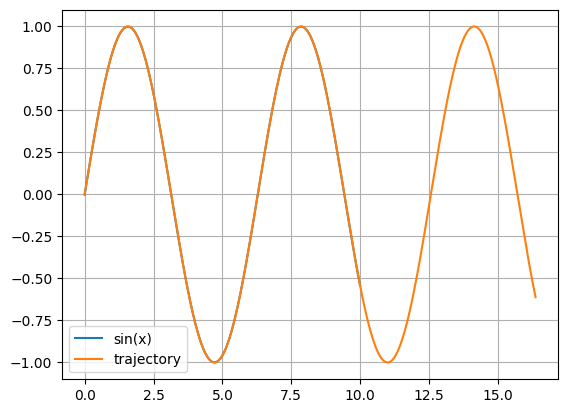

In [119]:
# Plot
x = np.linspace(0, 10, 100)
y = np.sin(x)
plt.plot(x, y, label="sin(x)")

plt.plot(x_list, y_list, label="trajectory")
plt.grid(True)
plt.legend()
plt.show()



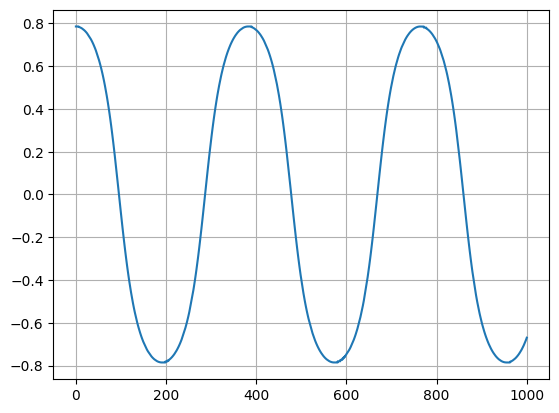

In [116]:
plt.plot(t_list, yaw_list, label="yaw")
plt.grid(True)
plt.show()


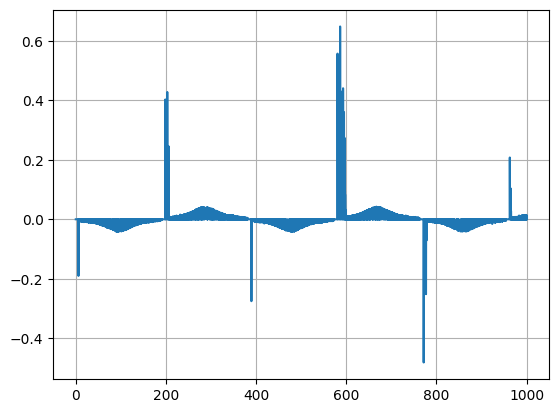

In [117]:
plt.plot(t_list, w_list, label="w")
plt.grid(True)
plt.show()


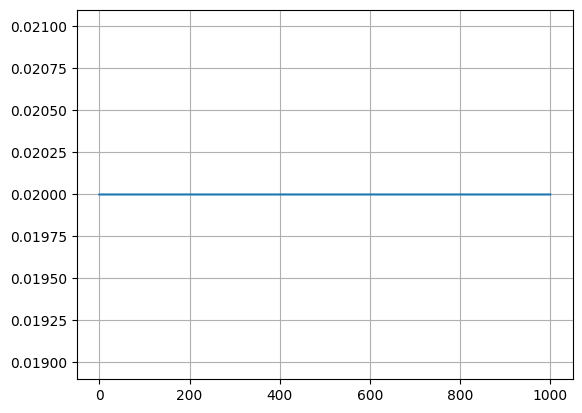

In [118]:
plt.plot(t_list, v_list, label="v")
plt.grid(True)
plt.show()